The notebook is a modified version of Jeremy Howard Kaggle [kernel](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data)

## Step 1: Download popular Marvel characters

In [5]:
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
import time

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [6]:
searches = 'ironman','spiderman','doctor strange','hulk','thanos','vision marvel','ant man','black panther','black widow', 'captain marvel','captain america'
path = Path('marvel_characters')

In [7]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo',max_images=50))
    resize_images(path/o, max_size=400, dest=path/o)

/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(messa

## Step 2: Remove invalid images

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:3007: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt

108

## Step 3: Train our model

We make slight changes to the dataloader.
- We use crop in `Resize`
- Add augmentations

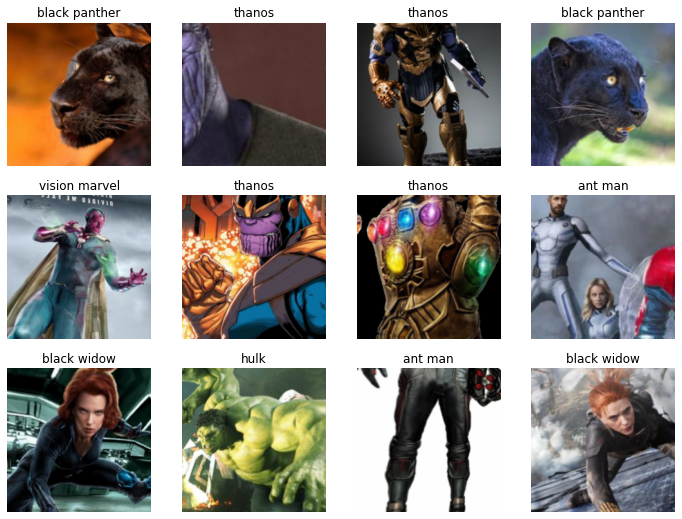

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)],
    batch_tfms=aug_transforms(size=224),
).dataloaders(path)

dls.show_batch(max_n=12)

In [10]:
learn = vision_learner(dls, 'seresnext50_32x4d', metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/seresnext50_32x4d_racm-a304a460.pth" to /home/.cache/torch/hub/checkpoints/seresnext50_32x4d_racm-a304a460.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.377130,1.998356,0.607143,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.504033,1.757730,0.523810,00:06
1,1.241482,1.518647,0.464286,00:05
2,1.060071,1.183796,0.333333,00:05
3,0.883063,0.894192,0.309524,00:05
4,0.738134,0.776254,0.261905,00:05
5,0.640223,0.729395,0.238095,00:05
6,0.552546,0.693932,0.214286,00:05
7,0.480888,0.692117,0.202381,00:05
8,0.419046,0.585912,0.178571,00:05
9,0.381878,0.552869,0.178571,00:05


In [11]:
learn.save('marvel_resnext50')

Path('models/marvel_resnext50.pth')

In [17]:
img = PILImage.create('ironman.jpeg')

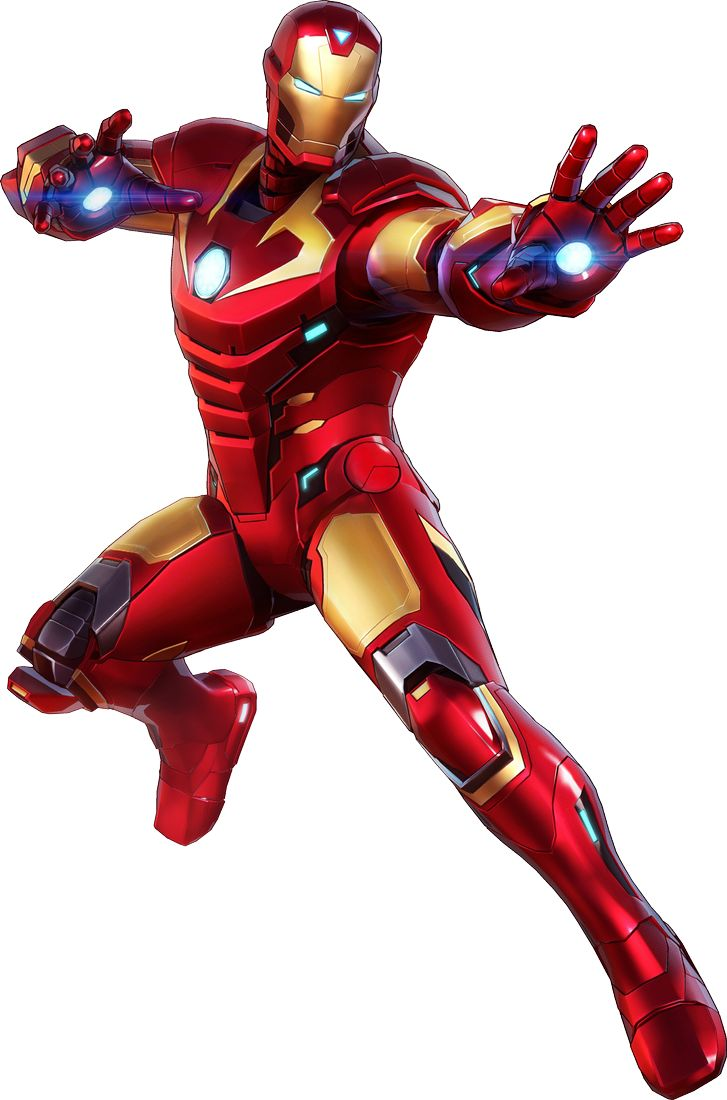

In [18]:
img

In [19]:
character,_,probs = learn.predict(img)

In [20]:
character

'ironman'